# Social Media Analytics Final Piala Dunia 2022 Qatar
# Kelompok B
1. Felicia (2006463976) 
2. Joan Bidadari Annandale (2006571085) 
3. Muhammad Jauhar Hakim (2006463982)
4. Nerissa Netanaya Setjiadi (1906375801)
5. Nicholas Sky Salvatio (2006532701)

**Link Video Presentasi :**
https://drive.google.com/file/d/1KfhjOTkS7ZLDHbXX3WnvgON4C2XxBPuw/view?usp=sharing 

# Pembagian Peran atau Tugas
**1. Felicia (2006463976)**: 
*   Data Scrapping
*   SNA
*   Pengerjaan PPT
*   Insight
*   Menyediakan template presentasi

**2. Joan Bidadari Annandale (2006571085)**:
*   Data Scrapping
*   Pengerjaan PPT
*   SNA
*   Gephi
*   Topic Modelling
*   Insight

**3. Muhammad Jauhar Hakim (2006463982)**:
*   Data Scrapping
*   Pengerjaan PPT
*   SNA
*   Gephi
*   Centrality Analysis
*   Community Detection
*   Insight

**4. Nerissa Netanaya Setjiadi (1906375801)**:
*   Data Scrapping
*   Pengerjaan PPT
*   Insight
*   Video editing

**5. Nicholas Sky Salvatio (2006532701)**
*   Data Scrapping
*   Pengerjaan PPT
*   Data Preprocessing
*   Text Preprocessing
*   EDA
*   Insight

# Problem Statement

* Apa saja informasi/insight yang dapat diambil dari media sosial Twitter selama berlangsungnya Final Piala Dunia FIFA 2022 Qatar?
* Bagaimana tanggapan/sentimen dari netizen Indonesia selama berlangsungnya Final Piala Dunia FIFA 2022 Qatar di media sosial Twitter?
* Apa saja akun-akun influencer dan/atau fanpage yang berpengaruh besar terhadap tweet Final Piala Dunia FIFA 2022 Qatar?


# Tujuan
* Menghasilkan Insight/Informasi Non-Trivial yang signifikan dari media sosial Twitter selama berlangsungnya Final Piala Dunia FIFA 2022 Qatar
* Untuk mengetahui apakah netizen Indonesia cenderung memiliki sentimen yang positif atau negatif di sosial media Twitter selama Final Piala Dunia FIFA 2022 Qatar.
* Untuk mengetahui akun-akun influencer dan/atau fanpage apa saja yang berpengaruh besar terhadap tweet Final Piala Dunia FIFA 2022 Qatar

# Data Collecting
Pengumpulan data dilakukan dengan menggunakan module tweepy dan API Twitter sehingga data yang dikumpulkan merupakan data yang legal dan dikumpulkan melalui jalur yang resmi.

Kami melakukan pengambilan data dari Hari Minggu, 18 Desember 2022 jam 08.00 WIB hingga Hari Kamis, 22 Desember 2022 Jam 13:00 WIB dengan keywordnya menggunakan **Piala Dunia** dan **Pildun**.

**Restart Run time dan Run All setelah install module (Total Run Time Sekitar 13 Menit)**

In [ ]:
!pip install tweepy==4.12.1
!pip install textblob
!pip install Sastrawi
!pip install  xlrd
!pip install  openpyxl==3.0.5
!pip install  nltk
!pip install  wordcloud
!pip install  networkx==2.8.8
!pip install  cdlib==0.2.6
!pip install  gensim==4.3.0
!pip install  pyldavis==3.2.1
!pip install  swifter
!pip install scipy==1.8
!pip install numpy==1.23.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [ ]:
import gdown
import tweepy
import json
import re
import pandas as pd
import numpy as np
from datetime import datetime
import sys
from socket import socket

import warnings; warnings.simplefilter('ignore')
import nltk
import warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import itertools

from itertools import chain

seed = 0
np.random.seed(seed)

In [ ]:
url = "https://drive.google.com/drive/folders/1d3WWnNgK4Jd3bUJU2rZe2e1p-FYcQlRS?usp=share_link"
gdown.download_folder(url, quiet=True, use_cookies=False)

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1anDUPZ0uJYx42Ke3doga-GWSMJGugMKY 



In [ ]:
#Request API Twitter
api_key = "s7W6y2igW4xSPbpZZPTFLz9Iw"
api_secret_key = "VxPOECjTcQl2dY9erkKVbhm149nR8sRQi4tADYrx13JLwEaMlD"
acces_token = "2664344720-AS2kZW6Agc7hoBMT0pg0EWiSbBhQvyuqzE6f1bK"
acces_token_secret = "sOUC2zD4d2IdT2N8LP6twW7r9Yptm3mWCeTDfWjXFiFUO"
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(acces_token, acces_token_secret)
api = tweepy.API(auth)
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAKXfjwEAAAAA8lH28787T1bEVSeZJUPtuLaVgao%3Dz3i5qZVOUbs38SCZmOYISa1VBH1WtlDCQuRhnVipxw1aeOHpAG')

In [ ]:
#Scrapping Twitter Data
response = client.search_recent_tweets(
    "pildun -is:retweet lang:id",
    
    max_results = 100,
    tweet_fields = ['id','author_id','created_at','text','lang','geo','public_metrics'],
    user_fields = ['name','username','location','verified'],
    expansions = ['geo.place_id', 'author_id'],
    place_fields = ['country','country_code']
)

In [ ]:
# Create Data Frame From Twitter Data:
data = pd.DataFrame(data=[tweet.text for tweet in response.data], columns=['Tweets'])
data['Author_ID'] = [tweet.author_id for tweet in response.data]
data['id'] = [tweet.id for tweet in response.data]
data['RT_Count'] = [tweet.public_metrics.get('retweet_count') for tweet in response.data]
data['Likes'] = [tweet.public_metrics.get('like_count') for tweet in response.data]
data['Reply'] = [tweet.public_metrics.get('reply_count') for tweet in response.data]
data['QRT'] = [tweet.public_metrics.get('quote_count') for tweet in response.data]
data['Date'] = [tweet.created_at for tweet in response.data]
print(data.shape)
data

(99, 8)


,Tweets,Author_ID,id,RT_Count,Likes,Reply,QRT,Date
0,@klarisaurus @NCTsmtown_127 Jilat trofi pildun...,2300029322,1608812243520729088,0,0,0,0,2022-12-30 13:08:23+00:00
1,"@lifRKY @barcastuff_idn Yaps, mau dibilang bur...",1297486092438925313,1608812243348783105,0,0,0,0,2022-12-30 13:08:23+00:00
2,ortu gue rewatch final pildun kaget gue berita...,1426188141983977473,1608811790053572609,0,0,0,0,2022-12-30 13:06:35+00:00
3,"bingo logo mixue, kumpulin jam 20:45 \nkategor...",1597098974762393603,1608810685307420679,0,0,6,8,2022-12-30 13:02:12+00:00
4,@NovitaHermawan @sidomie @janov20 Halah……tim k...,72179074,1608810397414592515,0,1,1,0,2022-12-30 13:01:03+00:00
...,...,...,...,...,...,...,...,...
94,"@nocontextfooty Abis ntn pildun, liat \nGinian...",64157569,1608752519408386048,0,0,0,0,2022-12-30 09:11:04+00:00
95,"@rgpermanaaa @dcacann Tak info nobar pildun, w...",1590860604,1608752045401726981,0,0,0,0,2022-12-30 09:09:11+00:00
96,Sungguh memalukan. Gimana mau jadi host pildun...,1608741892354904065,1608751766946082817,0,0,0,0,2022-12-30 09:08:05+00:00
97,@rintarouse hill kemaren nonton pildun gaa,1577170315272065025,1608751389534220288,0,0,1,0,2022-12-30 09:06:35+00:00


In [ ]:
df = pd.read_excel('/content/dataset/Dataset Analisis Sentimen Tweet Final Piala Dunia 2022 Qatar.xlsx', sheet_name="Sheet1")
print(df.shape)
df.head()

(39838, 8)


,Tweets,Author_ID,Tweet_ID,RT_Count,Likes,Reply,QRT,Date
0,Timnas Kroasia mengalahkan Maroko 2-1 dalam pe...,135783107,1.604285e+18,0,1,0,0,2022-12-18 08:19:56
1,@userjanghyun nanti malam piala dunia nonton d...,284310704,1.604285e+18,0,0,1,0,2022-12-18 08:19:30
2,Adu Mulut Mbappe-Martinez Jelang Final Piala D...,388190238,1.604285e+18,0,0,0,0,2022-12-18 08:19:02
3,"Apapun Kroasia Juara 3, yang penting liat Ivan...",1516355233332400128,1.604285e+18,0,0,0,0,2022-12-18 08:18:54
4,@DimasJaee @FaktaSepakbola Sebenarnya kutukan ...,1331692480140509952,1.604285e+18,0,0,0,0,2022-12-18 08:18:44


Keterangan :
* Data yang diambil sekitar 39 ribu baris yang berisi `Tweets`, `Author ID`, `Tweet ID`, `ReTweet Count`, `Likes Count`, `Reply Count`, `QRT Count`, `Date Created`
* Kami juga mengambil data `username` dari akun twitter yang ada di dalam data kami

# Data Preprocessing

In [ ]:
#import general library
import re
import string 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse
import tensorflow as tf
import keras
import requests
import io
import warnings
warnings.filterwarnings('ignore')

#preprocessing and scoring
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score

#text preprocessing
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#models and algos
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier


##customer pipeline function
from sklearn.base import BaseEstimator, TransformerMixin

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#We add additional dataset that contains stopwords in Bahasa Indonesia from GitHub
url_stopwords = "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/stopword_tweet_pilkada_DKI_2017.csv"
download_stopwords = requests.get(url_stopwords).content

stopwords = pd.read_csv(io.StringIO(download_stopwords.decode('utf-8')), header = None)

In [ ]:
print(df.shape)
df.head()

(39838, 8)


,Tweets,Author_ID,Tweet_ID,RT_Count,Likes,Reply,QRT,Date
0,Timnas Kroasia mengalahkan Maroko 2-1 dalam pe...,135783107,1.604285e+18,0,1,0,0,2022-12-18 08:19:56
1,@userjanghyun nanti malam piala dunia nonton d...,284310704,1.604285e+18,0,0,1,0,2022-12-18 08:19:30
2,Adu Mulut Mbappe-Martinez Jelang Final Piala D...,388190238,1.604285e+18,0,0,0,0,2022-12-18 08:19:02
3,"Apapun Kroasia Juara 3, yang penting liat Ivan...",1516355233332400128,1.604285e+18,0,0,0,0,2022-12-18 08:18:54
4,@DimasJaee @FaktaSepakbola Sebenarnya kutukan ...,1331692480140509952,1.604285e+18,0,0,0,0,2022-12-18 08:18:44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39838 entries, 0 to 39837
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Tweets     39838 non-null  object        
 1   Author_ID  39838 non-null  int64         
 2   Tweet_ID   39838 non-null  float64       
 3   RT_Count   39838 non-null  int64         
 4   Likes      39838 non-null  int64         
 5   Reply      39838 non-null  int64         
 6   QRT        39838 non-null  int64         
 7   Date       39838 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.4+ MB


In [ ]:
#Check missing value
df.isna().sum()

Tweets       0
Author_ID    0
Tweet_ID     0
RT_Count     0
Likes        0
Reply        0
QRT          0
Date         0
dtype: int64

In [ ]:
#Check duplicated value
print(df.duplicated().sum())

#Remove duplicated value
df.drop_duplicates(inplace = True)

print(df.duplicated().sum())

342
0


Keterangan :
* Pada dataset `df` dilakukan pemeriksaan untuk missing value. Didapatkan bahwa tidak ada missing value pada dataset `df`.
* Selanjutnya dilakukan pemeriksaan apakah ada data duplikat di dalam dataset `df` dan ditemukan ada sebnayak 342 data duplikat dan akhirnya kami drop data duplikat tersebut.

# Text Preprocessing

In [ ]:
#Create function for text (data) preprocessing
class DataPreprocessing:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    def remove_signs(self, feature, new = None):
        def delete_sign(tweet):
            # Remove number in string
            tweet = re.sub(r'[0-9]+', '', tweet)
            # Remove tab, new line, double space and back slice
            tweet = tweet.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"").replace('\s+', " ")
            # Remove non ASCII (emoticon, chinese word, .etc)
            tweet = tweet.encode('ascii', 'replace').decode('ascii')
            # Remove mention, link, hashtag
            tweet = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", tweet).split())
            # Remove incomplete URL
            tweet = tweet.replace("http://", " ").replace("https://", " ")
            # Remove doublespace and doubletick
            return tweet.replace('"', "").replace("'", "").replace("  ", " ")

        sentence = []
        for index, row in self.dataframe.iterrows():
            sentence.append(delete_sign(row[feature]))
        if new:
            self.dataframe[new] = sentence
        else:
            self.dataframe[feature] = sentence
    
    def remove_stopwords(self, feature, new = None):
        factory = StopWordRemoverFactory()

        # Add custom stopwords
        stopword_custom =["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'nyg', 'hehe', 'pen', 'nan', 'loh','&amp', 'yah']
        stopword_custom.extend(stopwords)

        # Add custom stopword to sastrawi and convert to dictionary
        stopword_sastrawi = factory.get_stop_words() + stopword_custom
        dictionary = ArrayDictionary(stopword_sastrawi)

        # Create StopWordRemover Function and add custom stopwords list
        stopword = StopWordRemover(dictionary)

        sentence = []
        for index, row in self.dataframe.iterrows():
            sentence.append(stopword.remove(row[feature]))

        if new:
            self.dataframe[new] = sentence
        else:
            self.dataframe[feature] = sentence

    def text_stemming(self, feature, new = None):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()

        def stemming(tweet):
            tweet = stemmer.stem(tweet)
            return tweet
        
        sentence = []
        for index, row in self.dataframe.iterrows():
            sentence.append(stemming(row[feature]))

        if new:
            self.dataframe[new] = sentence
        else:
            self.dataframe[feature] = sentence
    
    # Lazy Preprocessing
    def text_preprocessing(self, feature, new = None):
        if new:
            self.remove_signs(feature, new)
            self.remove_stopwords(new, new)
            self.text_stemming(new, new)
        else:
            self.remove_signs(feature)
            self.remove_stopwords(feature)
            self.text_stemming(feature)

In [ ]:
#Apply the preprocessing function
#df_preprocessing = DataPreprocessing(df)
#df_preprocessing.text_preprocessing('Tweets', 'Tweets_Cleaned')
#df

In [ ]:
#df.drop(['Tweets'], axis = 1, inplace = True)
#df.to_excel('Data Bersih.xlsx', index = False)
#df

In [ ]:
df_clean = pd.read_excel('/content/dataset/Data Bersih.xlsx', sheet_name = 'Sheet1')
print(df_clean.shape)
df_clean.head(5)

(39496, 7)


,Unnamed: 0,RT_Count,Likes,Reply,QRT,Date,Tweets_Cleaned
0,0,0,1,0,0,2022-12-18 08:19:56.000000,timnas kroasia kalah maroko - tanding piala du...
1,1,0,0,1,0,2022-12-18 08:19:30.000000,malam piala dunia nonton mana
2,2,0,0,0,0,2022-12-18 08:19:02.000001,adu mulut mbappe-martinez jelang final piala d...
3,3,0,0,0,0,2022-12-18 08:18:54.000000,apa kroasia juara penting liat ivana knoll dul...
4,4,0,0,0,0,2022-12-18 08:18:44.000000,benar kutu piala dunia tdk ada


In [ ]:
df_clean.drop(columns = df_clean.columns[0], axis=1, inplace=True)
df_clean.dropna(subset = ['Tweets_Cleaned'], inplace = True)
df_clean.drop_duplicates('Tweets_Cleaned', inplace = True)

print(df_clean.shape)
df_clean.head(5)

(34560, 6)


,RT_Count,Likes,Reply,QRT,Date,Tweets_Cleaned
0,0,1,0,0,2022-12-18 08:19:56.000000,timnas kroasia kalah maroko - tanding piala du...
1,0,0,1,0,2022-12-18 08:19:30.000000,malam piala dunia nonton mana
2,0,0,0,0,2022-12-18 08:19:02.000001,adu mulut mbappe-martinez jelang final piala d...
3,0,0,0,0,2022-12-18 08:18:54.000000,apa kroasia juara penting liat ivana knoll dul...
4,0,0,0,0,2022-12-18 08:18:44.000000,benar kutu piala dunia tdk ada


Keterangan :

Pada bagian ini dilakukan text preprocessing berupa :
* Menghapus berbagai simbol khusus, angka, link website, emoticon, double-line, dan double-space seperti  `@`,`#`,`0-9`,`https://`,` `, dan lain-lain pada kolom `tweets`
* Menghapus Stopwords dan Slang Bahasa Indonesia pada kolom `tweets`. Stopwords merupakan kata-kata yang tidak mengandung makna atau arti, sedangkan Slang adalah bahasa gaul dalam bahasa Indonesia yang perannya hampir sama seperti Stopwords sehingga perlu dihapuskan.
* Melakukan Tokenasi kata-kata pada kolom `tweets`. Tokenisasi singkatnya merupakan proses untuk membagi teks yang dapat berupa kalimat, paragraf atau dokumen, menjadi token-token/bagian-bagian tertentu.
* Melakukan Stemming pada kolom `tweets`. Stemming merupakan proses pengubahan suatu kata menjadi kata dasarnya.

# Computing Sentiment Polarity

*   Identifying polarity and subjectivity using TextBlob API
*   Sentimental Classification

## Polarity

Polarity mengacu pada penentuan sentimen cenderung pada positif, netral, atau negatif Polaritas berkisar antara -1 hingga +1, dimana [-1, 0) adalah sentimen negatif, rentang (0, +1] sebagai sentimen positif, dan 0 adalah netral. Polaritas kalimat dihitung sebagai jumlah dari polaritas semua kata dibagi dengan jumlah kata.

## Subjectivity

Subjectivity mengacu pada opini atau emosi individu. Subjektivitas berkisar antara 0.0 hingga 1.0 di mana 0.0 sangat objektif dan 1.0 sangat subjektif

In [ ]:
#Function to translate to english
def translate(x):
    try:
        blob = TextBlob(x)
        return (str(blob.translate(from_lang = 'id', to = 'en')))
    except: 
        return None

In [ ]:
#df_clean['Tweets_Cleaned'] = df_clean.Tweets_Cleaned.astype(str)

#Create a column to translate tweets from Bahasa Indonesia to English
#df_clean['Tweets_Eng'] = df_clean['Tweets_Cleaned'].apply(lambda x: translate(x))
#df_clean.to_excel('Data Bersih2.xlsx')
#df_clean

In [ ]:
#df_clean['Tweets_Eng'] = df_clean.Tweets_Eng.astype(str)

#Apply the preprocessing function
#df_clean_preprocessing = DataPreprocessing(df_clean)
#df_clean_preprocessing.text_preprocessing('Tweets_Eng', 'Tweets_Eng_Cleaned')
#df_clean

In [ ]:
#df_clean.drop(['Tweets_Eng'], axis = 1, inplace = True)
#df_clean.to_excel('Data Bersih3.xlsx', index = False)
#df_clean

In [ ]:
df_clean = pd.read_excel('/content/dataset/Data Bersih3.xlsx', sheet_name = 'Sheet1')
print(df_clean.shape)
df_clean.head()

(34560, 7)


,RT_Count,Likes,Reply,QRT,Date,Tweets_Cleaned,Tweets_Eng_Cleaned
0,0,1,0,0,2022-12-18 08:19:56.000000,timnas kroasia kalah maroko - tanding piala du...,croatian national team lose morocco - world cu...
1,0,0,1,0,2022-12-18 08:19:30.000000,malam piala dunia nonton mana,world cup night watch
2,0,0,0,0,2022-12-18 08:19:02.000001,adu mulut mbappe-martinez jelang final piala d...,mbappe-martinezs argument ahead of the world c...
3,0,0,0,0,2022-12-18 08:18:54.000000,apa kroasia juara penting liat ivana knoll dul...,what is the croatia champion is important to s...
4,0,0,0,0,2022-12-18 08:18:44.000000,benar kutu piala dunia tdk ada,true world cup lice do not exist


In [ ]:
#NLP using Textblon

#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [ ]:
#Create two new columns to save the results of the created functions 
df_clean['Subjectivity'] = df_clean['Tweets_Eng_Cleaned'].apply(getSubjectivity)
df_clean['Polarity'] = df_clean['Tweets_Eng_Cleaned'].apply(getPolarity)
print(df_clean.shape)
df_clean.head()

(34560, 9)


,RT_Count,Likes,Reply,QRT,Date,Tweets_Cleaned,Tweets_Eng_Cleaned,Subjectivity,Polarity
0,0,1,0,0,2022-12-18 08:19:56.000000,timnas kroasia kalah maroko - tanding piala du...,croatian national team lose morocco - world cu...,0.066667,0.00
1,0,0,1,0,2022-12-18 08:19:30.000000,malam piala dunia nonton mana,world cup night watch,0.000000,0.00
2,0,0,0,0,2022-12-18 08:19:02.000001,adu mulut mbappe-martinez jelang final piala d...,mbappe-martinezs argument ahead of the world c...,1.000000,0.00
3,0,0,0,0,2022-12-18 08:18:54.000000,apa kroasia juara penting liat ivana knoll dul...,what is the croatia champion is important to s...,1.000000,0.40
4,0,0,0,0,2022-12-18 08:18:44.000000,benar kutu piala dunia tdk ada,true world cup lice do not exist,0.650000,0.35


In [ ]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

# Create a new column 'Sentiment'
df_clean['Sentiment'] = df_clean['Polarity'].apply(getSentiment)
print(df_clean.shape)
df_clean.head()

(34560, 10)


,RT_Count,Likes,Reply,QRT,Date,Tweets_Cleaned,Tweets_Eng_Cleaned,Subjectivity,Polarity,Sentiment
0,0,1,0,0,2022-12-18 08:19:56.000000,timnas kroasia kalah maroko - tanding piala du...,croatian national team lose morocco - world cu...,0.066667,0.00,Neutral
1,0,0,1,0,2022-12-18 08:19:30.000000,malam piala dunia nonton mana,world cup night watch,0.000000,0.00,Neutral
2,0,0,0,0,2022-12-18 08:19:02.000001,adu mulut mbappe-martinez jelang final piala d...,mbappe-martinezs argument ahead of the world c...,1.000000,0.00,Neutral
3,0,0,0,0,2022-12-18 08:18:54.000000,apa kroasia juara penting liat ivana knoll dul...,what is the croatia champion is important to s...,1.000000,0.40,Positive
4,0,0,0,0,2022-12-18 08:18:44.000000,benar kutu piala dunia tdk ada,true world cup lice do not exist,0.650000,0.35,Positive


In [ ]:
df_clean['Sentiment']. value_counts()
#df_clean.to_excel('Data Bersih4.xlsx', index = False)

Neutral     15455
Positive    15086
Negative     4019
Name: Sentiment, dtype: int64

# Exploratory Data Analysis (EDA)

## Descriptive Visualization

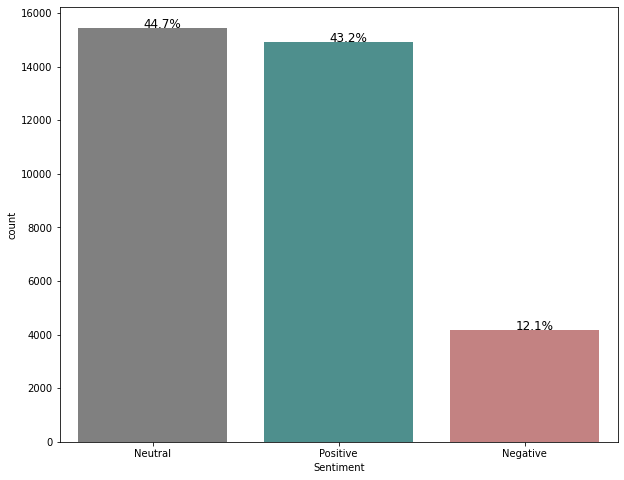

In [ ]:
def percent_data(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

df_clean1 = pd.read_excel('/content/dataset/Data Bersih Lengkap.xlsx', sheet_name = 'Sheet1')

plt.figure(figsize = (10,8))
ax = sns.countplot(data = df_clean1, x = 'Sentiment', palette = ["grey", "#439A97", "#CE7777"])
percent_data(ax, df_clean1.Sentiment)

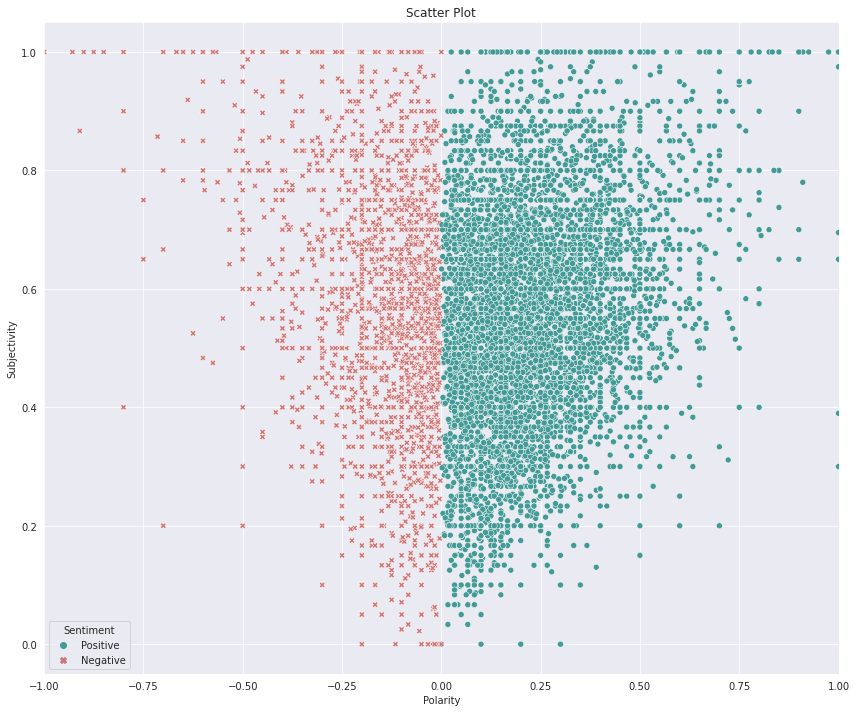

In [ ]:
#Because neutral too many, only using positive and negative sentiment
fil = df_clean1['Sentiment'].str.contains('Neutral')
df_clean1 = df_clean1[~fil]

#Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))

markers = {'Positive':'o','Negative':'X'}

sns.scatterplot(data = df_clean1, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette=["#439A97", "#CE7777"]).set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

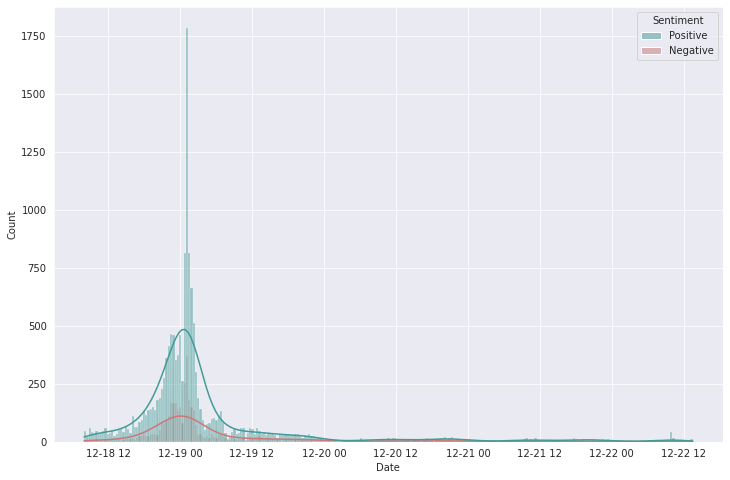

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(data = df_clean1, x = "Date", kde=True, hue = 'Sentiment', palette = ["#439A97", "#CE7777"])

Dari bar chart pertama, dapat dilihat bahwa sebagian besar tweet memiliki sentimen netral. Tweet dengan sentimen positif hampir sama banyaknya dengan sentimen positif. Sedangkan tweet sentimen negatif menempati urutan terakhir dengan perbedaan yang cukup jauh dari jumlah tweet sentimen positif.

Dari scatter plot, dapat dilihat, sesuai dengan bar chart sebelumnya, bahwa sentimen masyarakat terhadap final piala dunia cenderung positif. Hal ini dikarenakan berdasarkan polaritas, dengan nilai rata-rata 0.098, dapat diartikan bahwa sentimen masyarakat terhadap final piala dunia cenderung positif. Berdasarkan subjektivitas, dengan nilai rata-rata 0.42, dapat diartikan bahwa sentimen masyarakat cenderung subjektif

Dari figure terakhir, sesuai dengan hasil sebelumnya bahwa tweet sentimen positif jauh lebih banyak dibandingkan tweet sentimen negatif. Tweet, baik sentimen positif maupun negatif, memuncak pada tanggal 19 Desember 2022 pukul 00:00 WIB, ketika siaran final piala dunia perlangsung.

## Word Cloud

In [ ]:
#Split postive and negative sentiment
df_clean_pos = df_clean1[df_clean1['Sentiment'] == 'Positive']
df_clean_neg = df_clean1[df_clean1['Sentiment'] == 'Negative']

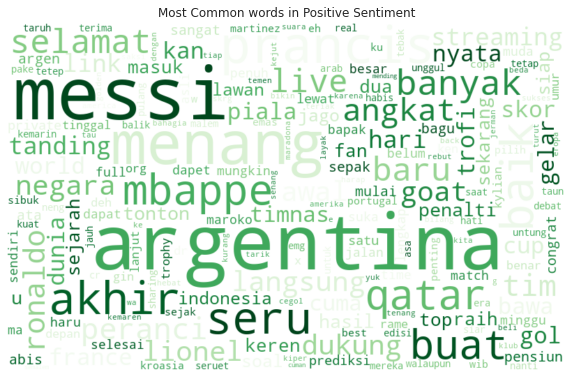

In [ ]:
#Visualizing all the words in our data which positive sentiment using the wordcloud plot.
df_clean_pos = df_clean_pos.astype(str)
all_words = ' '.join([text for text in df_clean_pos['Tweets_Cleaned']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Greens',background_color="white",collocations=False, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Positive Sentiment")
plt.show()

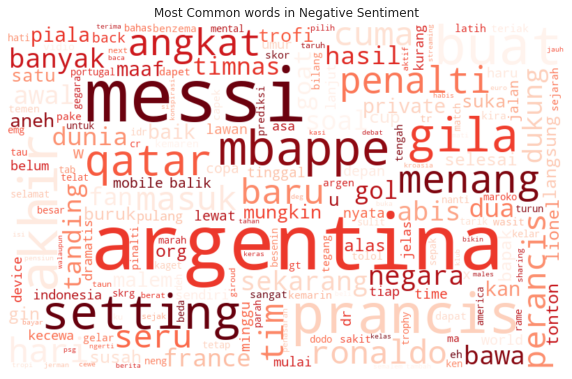

In [ ]:
#visualizing all the words in our data which negative sentiment using the wordcloud plot.
df_clean_neg = df_clean_neg.astype(str)
all_words = ' '.join([text for text in df_clean_neg['Tweets_Cleaned']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21,colormap='Reds',collocations=False,background_color="white", max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Negative Sentiment")
plt.show()

Dibuat dua Word Cloud untuk sentimen posotif dan negatif agar dapat men-visualisasi kata-kata apa saja yang sering digunakan dalam mengekspresikan suatu sentimen dalam twitter. Pada sentimen positif, kata argentina, messi, akhir, seru, dan menang merupakan top-5 kata yang digunakan. Sedangkan pada sentimen negatif, kata argentina, messi, setting, prancis, dan gila menjadi top-5 kata yang digunakan. Kata argentina dan messi muncul pada kedua sentimen karena dua kata tersebut menjadi topik yang diikuti kata lain penentu sentimennya.

# Social Network Analysis
Kami melakukan SNA dengan menggunakan data username dan mention yang ada di setiap baris tweets.

In [ ]:
dataauthusn = pd.read_csv('/content/dataset/authusn.csv')[['Author_ID','Username','Name']]
print(dataauthusn.shape)
dataauthusn.head()

(10093, 3)


,Author_ID,Username,Name
0,920720935476396032,txtnurcahyo,Wahyu Nurcahyo 🇮🇩 🇩🇪
1,745885178518700032,Nangim__,ً
2,865478487053697024,NChaeng423,Nina😴
3,1583509495904600064,1byeokhae,emci
4,784356720252289024,ovatioln,anna.


In [ ]:
datamention = pd.read_csv('/content/dataset/mentionauth.csv')
print(datamention.shape)
datamention.head()

(5069, 4)


,mention,Author_ID,Username,Name
0,userjanghyun,284310704,ANJlNK,1br4
1,"indosat,idextratime,xxsseulgi,notpickmegirl,be...",1940647735,bloodmoonrsg,nyan
2,infomalang,427380737,azulfik,Zulfikar Chaidir
3,_vino_alvino,78933317,BramRizaldi,Bram R.
4,SerieA_Lawas,97199687,tiwexers,Muhmad Arif Pratamax🔞


In [ ]:
username=dataauthusn.Username.to_list()
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(username)
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  10075
Banyak Edges =  0


In [ ]:
def Convert(string):
    li = list(string.split(","))
    return li

def kombin(x,y):
    hasil = list(itertools.product(x, y))
    return hasil

datamention['mentionlist'] = [Convert(str(isi)) for isi in datamention.mention]
datamention['usernamelist'] = [Convert(str(isi)) for isi in datamention.Username]
datamention['edges'] = datamention.apply(lambda x: kombin(x.usernamelist, x.mentionlist), axis=1)
datamention.head()

,mention,Author_ID,Username,Name,mentionlist,usernamelist,edges
0,userjanghyun,284310704,ANJlNK,1br4,[userjanghyun],[ANJlNK],"[(ANJlNK, userjanghyun)]"
1,"indosat,idextratime,xxsseulgi,notpickmegirl,be...",1940647735,bloodmoonrsg,nyan,"[indosat, idextratime, xxsseulgi, notpickmegir...",[bloodmoonrsg],"[(bloodmoonrsg, indosat), (bloodmoonrsg, idext..."
2,infomalang,427380737,azulfik,Zulfikar Chaidir,[infomalang],[azulfik],"[(azulfik, infomalang)]"
3,_vino_alvino,78933317,BramRizaldi,Bram R.,[_vino_alvino],[BramRizaldi],"[(BramRizaldi, _vino_alvino)]"
4,SerieA_Lawas,97199687,tiwexers,Muhmad Arif Pratamax🔞,[SerieA_Lawas],[tiwexers],"[(tiwexers, SerieA_Lawas)]"


In [ ]:
edges=[]
for i in datamention.edges:
    for j in range(len(i)):
        edges.append(i[j])

G.add_edges_from(edges)
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  12164
Banyak Edges =  4136


In [ ]:
G2 = nx.Graph() # Graph Kosong Baru
print('Banyak vertex = ', G2.number_of_nodes())
print('Banyak Edges = ', G2.number_of_edges())

G2.add_edges_from(edges)
print('Banyak vertex = ', G2.number_of_nodes())
print('Banyak Edges = ', G2.number_of_edges())

Banyak vertex =  0
Banyak Edges =  0
Banyak vertex =  4731
Banyak Edges =  4136


In [ ]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pildun.gexf")

print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G2, "pildun2.gexf")

Export ke GexF untuk di import ke Gephi
Export ke GexF untuk di import ke Gephi


Untuk visualisasi lebih lanjut kami menggunakan gephi untuk melihat label lebih jelas di setiap graphnya. Kami melakukan visualisasi graph menjadi 2 versi yaitu dengan menggunakan akun `idextratime` dan yang meniadakannya sehingga didapatkan visualisasinya menjadi :

<img src="https://drive.google.com/uc?export=view&id=13zj8PcctTWTkSb7S4wPAH3sPj6Nh-XDe" alt="isolated" width="600"/>
<img src="https://drive.google.com/uc?export=view&id=1aFMAA-9RA2MgFhDEGTZSuaJR-R0mC93j" alt="isolated" width="600"/>

**Keterangan :**

Setelah Itu kami memutuskan lebih lanjut memeriksa beberapa akun yang cukup besar di grafik di atas, berikut ini beberapa akun twitter yang kami periksa :

1. @idextratime
2. @vidio
3. @FaktaSepakbola
4. @Indosat
5. @eduardojonath15
6. @Dennysiregar7
7. @Erlangga_25
8. @brpptu
9. @realmadridindo1
10. @PorosHalangID
11. @Siaranbolalive
12. @The_RedsIndo

Keterangan Insight yang Didapat dari akun-akun yang bukan bot/spam :
* @idextratime merupakan akun Fanpage yang mendominasi engangement topik piala dunia dalam kurun waktu 18 Desember 2022 sampai dengan 20 Desember 2022. Setelah kami selidiki lebih lanjut, ternyata akun tersebut merupakan akun meme dan sering membahas hal-hal seputar sepak bola. Dikarenakan akun tersebut memiliki followers yang cukup ramai juga, sangat mudah baginya untuk menggiring opini masyarakat terkait kejadian-kejadian di piala dunia sehingga menimbulkan beberapa tweet-tweet menjadi kontroversial dan cenderung memicu perdebatan.

<img src="https://drive.google.com/uc?export=view&id=1_elGtW8c3FST15D1401bB9bUwqHNYTxX" alt="isolated" width="600"/>

* @Dennysiregar7 merupakan akun influencer yang cukup mendominasi engangement piala dunia, ia merupakan akun influencer yang `cukup netral`. terlepas dari siapapun yang ia dukung, ia tetap memberikan ucapan selamat kepada Argentina. Tweet-tweet yang ia lakukan juga memiliki jumlah likes dan reply yang tinggi.
* @vidio dan @Indosat memiliki engangement yang tinggi selama durasi piala dunia berlangsung diakibatkan oleh terjadinya kesalahan dalam layanan yang mereka berikan sebagai provider siaran bola sehingga banyak penggunanya yang memprotes dan melakukan mention terhadap akun mereka melalui Twitter. Hal tersebut dapat dilihat dengan tangkapan layar berikut dimana mereka meminta maaf terhadap kesalahan jaringan.

<img src="https://drive.google.com/uc?export=view&id=1-hMYQToJtxgeXr7v_ILwrRxPP9nhfgrL" alt="isolated" width="600"/>

* @FaktaSepakbola, @Siaranbolalive, @realmadridindo1, @The_RedsIndo, dan @PorosHalangID merupakan akun-akun fanpage bola yang memiliki engangement tinggi juga. Dapat dilihat dari jumlah likes dan reply yang banyak. Akun-akun tersebut cenderung memiliki `sentimen positif` terhadap siaran piala dunia dapat dilihat karena mereka memberikan ucapan selamat ketika messi menang.

<img src="https://drive.google.com/uc?export=view&id=1SD2XMlY8l4VaZ4K9I2Xr-_fCiiLenYiI" alt="isolated" width="600"/>

<img src="https://drive.google.com/uc?export=view&id=1SEIV7-dYEup66bXA3TQ5a89lkuo2EPFp" alt="isolated" width="600"/>

* Sedangkan untuk akun-akun Twitter yang tidak disebutkan diatas, ketika cek ternyata merupakan akun SPAM atau bot. Sehingga insight yang akun-akun tersebut berikan kurang valid

## Centrality Analysis

In [ ]:
import operator

def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
    data = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 # 1 standard Deviation CI
        data = data[:N]
        out = len(data[abs(data - np.mean(data)) > m * np.std(data)]) # outlier within m stDev interval
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(data[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) # Spring LayOut
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
        nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
        plt.show() # Show the graph
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

### Closeness Centrality

In [ ]:
Gt1 = Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'aimul01', 'faizalaziz_id', 'MakCioo', 'belsss_sky', 'AlbertFer19', '_nawra07', 'ro_likur', 'jncksu', 'Latif54Latif']
Influencial Users Scores: [0.06035189 0.0483089  0.04717893 0.04717313 0.04708619 0.04690753
 0.04670174 0.04644703 0.04640766 0.04636836]


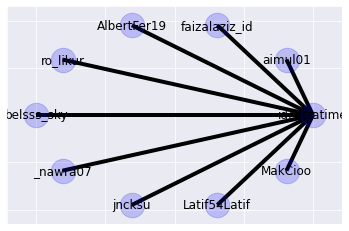

In [ ]:
drawGraph(Gt1, True, layOut='circular')

### Eigen Vector Centrality

In [ ]:
Gt2 = Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'indosat', 'MakCioo', 'mryanrinaldiy', 'Nir12345535', 'PaltiRS', 'Goen_Prayoga', 'Andi_Azhar18', 'stadiuvm', 'Erlangga_25']
Influencial Users Scores: [0.70265934 0.03844287 0.03770203 0.03753989 0.03661299 0.03637593
 0.03610123 0.03601292 0.0360016  0.03592424]


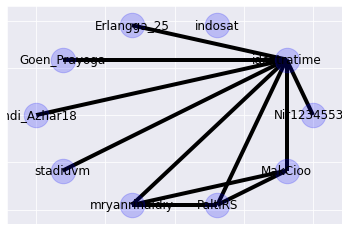

In [ ]:
drawGraph(Gt2, True, layOut='circular')

Insight dari Centrality Analysis :

* Dengan Closeness Centrality akun `idextratime` memiliki kemudahan dan kecepatan menyampaikan informasi untuk mencapai  berbagai akun yang ada twitter
* Dengan EigenVector Centrality diketahui bahwa akun `indosat` kurang baik terhubung dengan akun lain yang sedang membahas piala dunia. Artinya akun `indosat` hanya menumpang menggunakan kata-kata piala dunia padahal sebenarnya isi tweetnya hanyalah reply-reply dari user indosat yang terkena gangguan [sudah diperiksa langsung]

## Community Detection

Dilakukan clustering dengan bantuan ghepi didapatkan modularity sebesar 0.951


<img src="https://drive.google.com/uc?export=view&id=1sdqU0ZnMDFg93uBeUCJ5PtSaXs89vxZw" alt="isolated" width="600"/>
<img src="https://drive.google.com/uc?export=view&id=1DF1_LpP4_K9D79xgqN5FdMu0UnOlY1Ww" alt="isolated" width="600"/>
<img src="https://drive.google.com/uc?export=view&id=1NsN_FyuGGfq4wWGw1e_r0F2eSpy9sbv7" alt="isolated" width="600"/>
<img src="https://drive.google.com/uc?export=view&id=1p8Su08xbkHLuYxBZCk9ntjkjho_jZplO" alt="isolated" width="600"/>
<img src="https://drive.google.com/uc?export=view&id=18GoItNccoHAXg7HduzQnFIKQ7s3j_qD5" alt="isolated" width="450"/>
<img src="https://drive.google.com/uc?export=view&id=1xS093sbEbziboLJV6PTURdZiinDGwz2O" alt="isolated" width="450"/>

**Keterangan :**

Dengan data `piala dunia` dan `pildun` terdapat beberapa cluster besar yang terbentuk dengan beberapa akun sebagai pusat utama.
1. Cluster 1 : Cluster `idextratime`
2. Cluster 2 : Cluster `vidio`
3. Cluster 3 : Cluster `indosat`
4. Cluster 4 : Cluster `FaktaSepakbola`, `utdfocusid`, `PorosHalangID`
5. Cluster 5 : Cluster `SiaranBolaLive`
6. Cluster 6 : Cluster `The_RedsIndo`, `AlbertFer19`, `Erlangga_25`
7. Cluster 7 : Cluster `FIFAWorldCup`, `panditfootball`, `registaco`
8. Cluster 8 : Cluter lainnya yang tidak tersambung atau terisolasi seperti `brpptu` dan `mandortambalban`

# Topic Modelling

## Preprocessing untuk Topic Modelling

In [ ]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

In [ ]:
dfuji = pd.read_excel('/content/dataset/Data Bersih Lengkap.xlsx', sheet_name = 'Sheet1')
dfuji.head()

,Author_ID,Tweet_ID,RT_Count,Likes,Reply,QRT,Date,Tweets_Cleaned,Tweets_Eng_Cleaned,Subjectivity,Polarity,Sentiment
0,135783107,1.604285e+18,0,1,0,0,2022-12-18 08:19:56.000000,timnas kroasia kamaroko tandingatrehak atas me...,croatian national teamse morocco world cup sta...,0.066667,0.00,Neutral
1,284310704,1.604285e+18,0,0,1,0,2022-12-18 08:19:30.000000,malam,world cupght watch,0.000000,0.00,Neutral
2,388190238,1.604285e+18,0,0,0,0,2022-12-18 08:19:02.000001,mulut mbappe martinez,mbappe martinezs argumentead of the world cup,1.000000,0.00,Neutral
3,1516355233332400128,1.604285e+18,0,0,0,0,2022-12-18 08:18:54.000000,kroasia penting ivana knolles modric marokos k...,what is the croatia champion is important to s...,1.000000,0.40,Positive
4,1331692480140509952,1.604285e+18,0,0,0,0,2022-12-18 08:18:44.000000,benar kutu tdk,true world cup lice do not exist,0.650000,0.35,Positive


In [ ]:
dfuji['Tweets_Cleaned'].apply(str)

0        timnas kroasia kamaroko tandingatrehak atas me...
1                                                    malam
2                                   mulut mbappe martinez 
3        kroasia penting ivana knolles modric marokos k...
4                                           benar kutu tdk
                               ...                        
34555    justru suka messi atapun ronaldo duak idola se...
34556    btuln psg kaselamat buat mbappe top skor kasel...
34557            id dodo pake topeng pgn pegang piala soal
34558    china gin the rest of the world bahkan uhappy ...
34559    time knp dodoglovers lawak dek euro bantai arg...
Name: Tweets_Cleaned, Length: 34560, dtype: object

In [ ]:
nltk.download('punkt')

dfuji['Tweets_Cleaned'] = dfuji['Tweets_Cleaned'].apply(str)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans(" "," ",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dfuji['Tweets_Cleaned'] = dfuji['Tweets_Cleaned'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dfuji['Tweets_Cleaned'] = dfuji['Tweets_Cleaned'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dfuji['Tweets_Cleaned'] = dfuji['Tweets_Cleaned'].apply(remove_singl_char)

# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dfuji['Tweets_Cleaned'] = dfuji['Tweets_Cleaned'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(dfuji['Tweets_Cleaned'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenizing Result : 

0    [timnas, kroasia, kamaroko, tandingatrehak, at...
1                                              [malam]
2                            [mulut, mbappe, martinez]
3    [kroasia, penting, ivana, knolles, modric, mar...
4                                   [benar, kutu, tdk]
Name: Tweets_Cleaned, dtype: object


In [ ]:
def freqDist_wrapper(text):
    return FreqDist(text)

dfuji['Tweets_Cleaned_fdist'] = dfuji['Tweets_Cleaned'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(dfuji['Tweets_Cleaned_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(timnas, 1), (kroasia, 1), (kamaroko, 1), (ta...
1                                         [(malam, 1)]
2             [(mulut, 1), (mbappe, 1), (martinez, 1)]
3    [(kroasia, 2), (penting, 1), (ivana, 1), (knol...
4                    [(benar, 1), (kutu, 1), (tdk, 1)]
Name: Tweets_Cleaned_fdist, dtype: object


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'argens', 'emg','knp', 'org','skrg','dr','an','gegara','trs',
                       'pake','btuln','pas','argentinas','ku','deh'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dfuji['Tweets_Cleaned_WSW'] = dfuji['Tweets_Cleaned'].apply(stopwords_removal) 

print(dfuji['Tweets_Cleaned_WSW'].head())

0    [timnas, kroasia, kamaroko, tandingatrehak, me...
1                                              [malam]
2                            [mulut, mbappe, martinez]
3    [kroasia, ivana, knolles, modric, marokos, kro...
4                                               [kutu]
Name: Tweets_Cleaned_WSW, dtype: object


In [ ]:
doc_clean = dfuji['Tweets_Cleaned_WSW']
doc_clean.head(5)

0    [timnas, kroasia, kamaroko, tandingatrehak, me...
1                                              [malam]
2                            [mulut, mbappe, martinez]
3    [kroasia, ivana, knolles, modric, marokos, kro...
4                                               [kutu]
Name: Tweets_Cleaned_WSW, dtype: object

## LDA Model with Gensim

In [ ]:
#apabila terjadi error, maka harus di restart runtime dan run all kembali
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary<48988 unique tokens: ['kamaroko', 'kroasia', 'medali', 'perunggu', 'tandingatrehak']...>


In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

total_topics = 3 # jumlah topik yang akan di extract
number_words = 10 # jumlah kata per topik

In [ ]:
# Running and Trainign LDA model on the document term matrix.
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

[(0,
  '0.036*"argentina" + 0.029*"messi" + 0.025*"menang" + 0.015*"mbappe" + 0.013*"prancis" + 0.007*"tim" + 0.007*"dukung" + 0.007*"negara" + 0.006*"qatar" + 0.006*"timnas"'),
 (1,
  '0.023*"messi" + 0.011*"ronaldo" + 0.010*"angkat" + 0.006*"selesai" + 0.005*"fans" + 0.005*"piala" + 0.005*"suka" + 0.004*"trofi" + 0.004*"kemaren" + 0.004*"cup"'),
 (2,
  '0.016*"seru" + 0.010*"abis" + 0.006*"gin" + 0.005*"kelar" + 0.005*"langsung" + 0.004*"qatar" + 0.004*"match" + 0.004*"link" + 0.004*"asa" + 0.004*"indonesia"')]

In [ ]:
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
print(df_imp_wcount)

         word  topic_id  importance  word_count
0   argentina         0    0.035903        4906
1       messi         0    0.029009        5549
2      menang         0    0.025133        2423
3      mbappe         0    0.014911        1597
4     prancis         0    0.012773        2572
5         tim         0    0.007276         715
6      dukung         0    0.006656         688
7      negara         0    0.006638         582
8       qatar         0    0.006473        1577
9      timnas         0    0.005634         546
10      messi         1    0.023045        5549
11    ronaldo         1    0.010758         741
12     angkat         1    0.010129        1235
13    selesai         1    0.005717         422
14       fans         1    0.005007         411
15      piala         1    0.004945         610
16       suka         1    0.004556         307
17      trofi         1    0.004410         760
18    kemaren         1    0.004337         192
19        cup         1    0.004240     

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts = word):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0              0.9031   
1            1             2.0              0.6430   
2            2             0.0              0.5849   
3            3             0.0              0.9023   
4            4             0.0              0.6666   
5            5             0.0              0.9154   
6            6             0.0              0.7596   
7            7             1.0              0.9392   
8            8             1.0              0.7272   
9            9             0.0              0.7472   

                                            Keywords  \
0  argentina, messi, menang, mbappe, prancis, tim...   
1  seru, abis, gin, kelar, langsung, qatar, match...   
2  argentina, messi, menang, mbappe, prancis, tim...   
3  argentina, messi, menang, mbappe, prancis, tim...   
4  argentina, messi, menang, mbappe, prancis, tim...   
5  argentina, messi, menang, mbappe, prancis, tim...   
6  argentina,

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(total_topics))

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]

In [ ]:
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.216277  0.091002       1        1  43.14799
1      0.026086 -0.225401       2        1  31.40021
2      0.190191  0.134399       3        1  25.45180, topic_info=          Term         Freq        Total Category  logprob  loglift
20   argentina  3195.000000  3195.000000  Default  30.0000  30.0000
41      menang  2237.000000  2237.000000  Default  29.0000  29.0000
42       messi  4074.000000  4074.000000  Default  28.0000  28.0000
572       seru   854.000000   854.000000  Default  27.0000  27.0000
8       mbappe  1327.000000  1327.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
875     tonton   115.951794   253.569619   Topic3  -6.1153   0.5859
360      masuk   133.757804   569.679005   Topic3  -5.9724  -0.0807
537      nyata   109.110259   300.681528   Topic3  -6.1761   0.3547
25     prancis   128.193254  1265.190133   Topic3  -6.0149  -0.9211
90     tanding   100.207192   327.682619   Topic3  -6.2612   0.1836

[151 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2254      3  0.998345    abis
2371      3  0.996645     aff
2226      2  0.993322      ak
777       1  0.492532     all
777       2  0.506934     all
...     ...       ...     ...
2175      3  0.993625  untung
226       2  0.996837   world
3299      3  0.989212     yok
3276      2  0.011557     you
3276      3  0.993943     you

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis_data, 'output_filename.html')
#download output dalam bentuk html

Didapati dua jenis output, yaitu bar chart dan intertopic distance map. Bar chart menunjukan 30 kata yang paling sering digunakan dalam tweet. Sedangkan intertopic distance map menandakan kata-kata apa saja yang paling sering digunakan dalam suatu topik. Hasil default (tanpa terikat dengan topik apapun) ditandai dengan warna biru, sedangkan kata yang terikat pada topik ditandai dengan warna merah. Semakin panjang sebuah bar chart suatu kata maka semakin relevan kata tersebut.


Dari kata-kata yang paling sering muncul pada setiap topik, terlihat topik 1 berisi tweet mengenai pertandingan final Argentina vs Prancis. Topik 2 berisi tweet mengenai piala dunia yang telah berakhir dengan Messi (Argentina) sebagai pemenang. Topik 3 berisi tweet mengenai rasa seru dan pengalaman positif yang dirasakan saat menonton piala dunia.

Insight non-trivial yang dapat diambil dari grafik ini adalah sebagaimana pemain-pemain tertentu (Messi, Mbappe, Ronaldo) memiliki keyword yang lebih relevan daripada bahkan nama tim mereka masing-masing. Hal ini dapat menjelaskan bahwa orang-orang cenderung lebih peduli terhadap pemainnya daripada timnya sendiri. Mengingat bahwa ketiga nama pemain ini sedang naik daun mungkin mereka dapat digunakan untuk mempromosikan sesuatu.

Dikarenakan Ronaldo, Messi, dan Mbappe sedang sangat populer maka disarankan menggunakan mereka untuk mempromosikan suatu hal apalagi nama mereka memiliki konotasi positif atau merekrut mereka bila ingin meningkatkan popularitas sebuah tim bola. Khususnya Mbappe dikarenakan dia merupakan nama baru sehingga seharusnya biaya dia tidak sebesar nama-nama lama.

# Kesimpulan
* Mayoritas orang memiliki sentimen positif terhadap final Piala Dunia.
* Netizen Indonesia di Twitter cenderung lebih senang melakukan "engangement" mengenai final piala dunia melalui akun-akun fanpage dibanding akun influencer.
* Komentar negatif cenderung menganggap bahwa Piala Dunia berupa settingan.
* Orang cenderung lebih mengomentari "Star Player" masing-masing tim (contoh: Messi, Ronaldo, Mbappe) dibandingkan tim-nya keseluruhan.

# Rekomendasi
* Bila ingin menggiring sebuah opini atau mempromosikan sesuatu berkaitan dengan piala dunia maka sangat disarankan untuk memilih akun fanpage yang paling populer yaitu @idextratime.
* Nama nama pemain piala dunia, khsususnya Mbappe yang sedang naik daun dapat digunakan sebagai sarana untuk promosi (endorse)  bagi akun-akun online shop atau perusahaan lainnya karena mempunyai konotasi positif
* Untuk perusahaan yang berfokus pada layanan siaran video, disarankan untuk melakukan layanan siaran LIVE piala dunia kedepannya, dikarenakan banyak masyarakat Indonesia yang menggunakan layanan streaming. Hal ini dibuktikan dengan insight yang didapatkan tadi, terdapat banyak engangement dengan akun Twitter @vidio untuk menyampaikan komplen terkait siaran yang terganggu ketika pildun berlangsung.